## Malaria detection using CNN by Nikhil Bora and Pratik Mehkarkar

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




2021-12-09 11:59:31.200163: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [6]:
folders

['Dataset/Train/Parasite', 'Dataset/Train/Uninfected']

In [7]:
# our layers 
x = Flatten()(mobilnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
from tensorflow.keras.layers import MaxPooling2D

In [11]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# 
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [15]:
training_set

In [16]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/var/folders/yv/g0br10m156710fj7db2l2xch0000gn/T/ipykernel_944/4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
13/13 [==============================] - 9s 618ms/step - loss: 2.1151 - accuracy: 0.4832 - val_loss: 0.6333 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 8s 601ms/step - loss: 0.6426 - accuracy: 0.6442 - val_loss: 0.7891 - val_accuracy: 0.3955
Epoch 3/50
13/13 [==============================] - 8s 625ms/step - loss: 0.5498 - accuracy: 0.7043 - val_loss: 0.9244 - val_accuracy: 0.3209
Epoch 4/50
13/13 [==============================] - 8s 601ms/step - loss: 0.4633 - accuracy: 0.7620 - val_loss: 1.1146 - val_accuracy: 0.3284
Epoch 5/50
13/13 [==============================] - 8s 586ms/step - loss: 0.4688 - accuracy: 0.7788 - val_loss: 0.8060 - val_accuracy: 0.5000
Epoch 6/50
13/13 [==============================] - 8s 575ms/step - loss: 0.3688 - accuracy: 0.8462 - val_loss: 0.8568 - val_accuracy: 0.5224
Epoch 7/50
13/13 [==============================] - 8s 591ms/step - loss: 0.3247 - accuracy: 0.8558 - val_loss: 0.6101 - val_accuracy: 0.6418
Epoch 

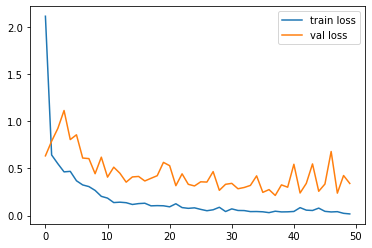

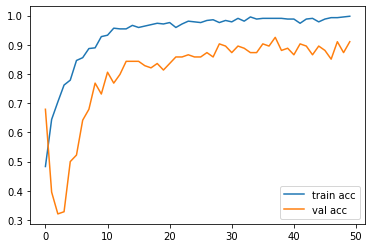

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model.h5')

In [20]:

y_pred = model.predict(test_set)


In [21]:
y_pred

array([[1.0000000e+00, 1.0834731e-11],
       [9.9280787e-01, 7.1921740e-03],
       [1.0000000e+00, 1.8453897e-14],
       [2.3639232e-03, 9.9763608e-01],
       [9.9995780e-01, 4.2165386e-05],
       [9.9999499e-01, 5.0631838e-06],
       [6.1867213e-01, 3.8132787e-01],
       [1.0000000e+00, 2.2147311e-09],
       [9.9945301e-01, 5.4694933e-04],
       [8.0829597e-01, 1.9170402e-01],
       [1.2041107e-01, 8.7958896e-01],
       [1.0000000e+00, 7.1650971e-14],
       [9.9999917e-01, 8.4492962e-07],
       [2.4717741e-03, 9.9752825e-01],
       [1.0000000e+00, 6.8159300e-10],
       [9.9999952e-01, 4.8517148e-07],
       [6.1128568e-03, 9.9388713e-01],
       [9.9999976e-01, 2.8647273e-07],
       [4.4256590e-02, 9.5574343e-01],
       [4.7026294e-01, 5.2973700e-01],
       [1.8243146e-01, 8.1756854e-01],
       [1.4776923e-02, 9.8522305e-01],
       [9.9985099e-01, 1.4903021e-04],
       [2.9054321e-03, 9.9709451e-01],
       [9.9999928e-01, 6.8139212e-07],
       [1.8878453e-03, 9.

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0])

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model.h5')

In [42]:
img=image.load_img('Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_110352_cell_80.png',target_size=(224,224))



In [35]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [36]:
x.shape

(224, 224, 3)

In [37]:
x=x/255

In [38]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [39]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [40]:
a=np.argmax(model.predict(img_data), axis=1)

In [41]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
